*Importing Libiraries*

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
df = pd.read_csv('diabetes - diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.shape

(768, 9)

*From searching about diabetes we will find that 'Diabetes is a condition that happens when your blood sugar (glucose) is too high.', So we can define important features from this sentence*
*whiche are Glucose , Insulin , BMI*

*Another type of diabetes "Type 1 diabetes : Up to 10% of people who have diabetes have Type 1. It’s usually diagnosed in children and young adults, but it can develop at any age."*

*So we can conclude that Age is important feature*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plotting

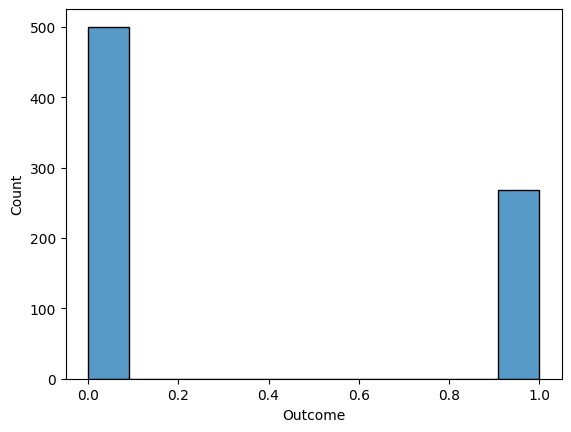

In [12]:
sns.histplot(data = df , x = 'Outcome')
plt.show()

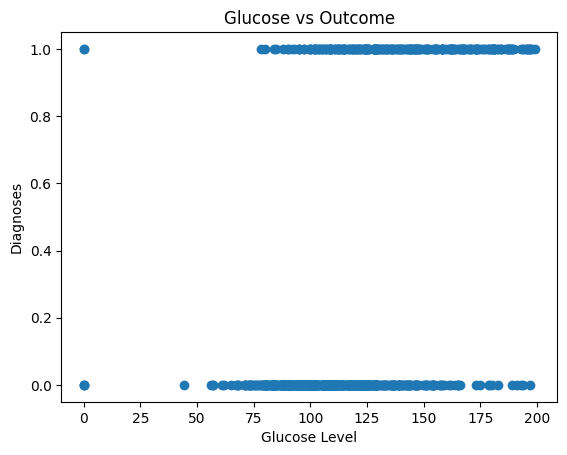

In [14]:
plt.scatter(data = df , x = 'Glucose' , y = 'Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Diagnoses')
plt.title('Glucose vs Outcome')
plt.show()

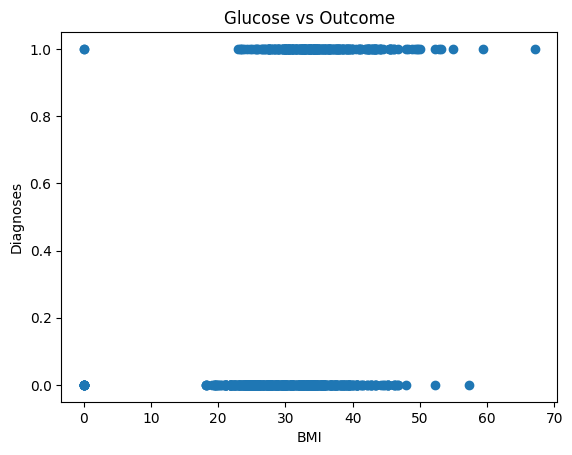

In [15]:
plt.scatter(data = df , x = 'BMI' , y = 'Outcome')
plt.xlabel('BMI')
plt.ylabel('Diagnoses')
plt.title('Glucose vs Outcome')
plt.show()

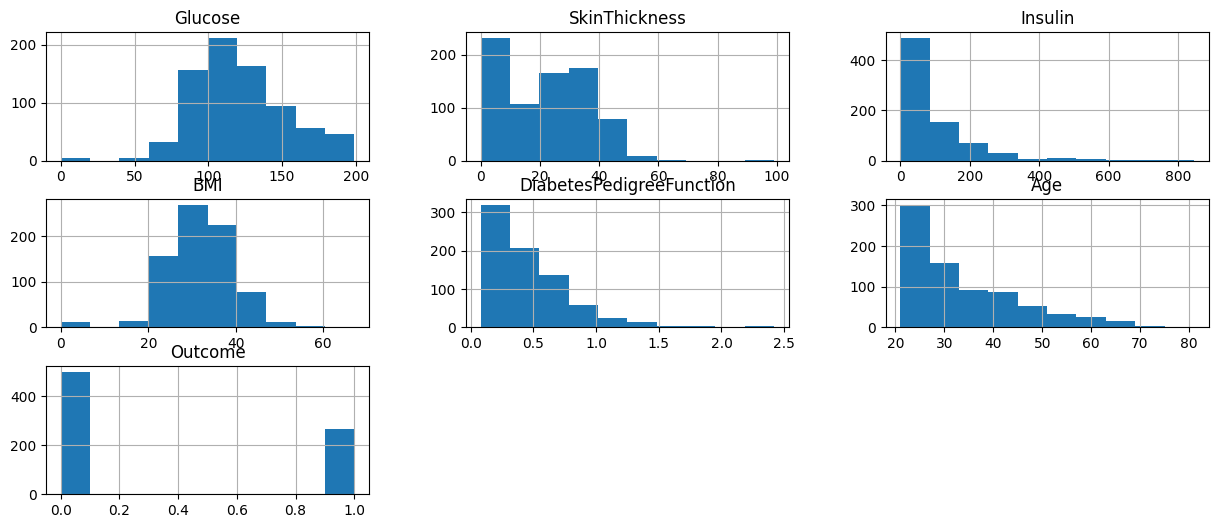

In [25]:
df.hist(figsize = (15 , 6))
plt.show()

# Pre processing

In [21]:
df.drop(columns = ['Pregnancies' , 'BloodPressure'] , axis = 1 , inplace = True)

In [22]:
df.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,35,0,33.6,0.627,50,1
1,85,29,0,26.6,0.351,31,0
2,183,0,0,23.3,0.672,32,1
3,89,23,94,28.1,0.167,21,0
4,137,35,168,43.1,2.288,33,1


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df.drop('Outcome' , axis = 1)
y = df['Outcome']

Sclaer = StandardScaler()

X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

X_train = Sclaer.fit_transform(X_train)
X_test = Sclaer.transform(X_test)

In [28]:
print(f"X_train shape : {X_train.shape} / X_trst shape : {X_test.shape}")

X_train shape : (614, 6) / X_trst shape : (154, 6)


# Models

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ----- Logistic Regression -----
log_reg = LogisticRegression()

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
print("Best Logistic Regression params:", grid_lr.best_params_)

y_pred_lr = best_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# ----- Random Forest -----
rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best Random Forest params:", grid_rf.best_params_)

y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Logistic Regression params: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.7662337662337663
Best Random Forest params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Accuracy: 0.7532467532467533


# Evaluation

In [33]:
# ----- Logistic Regression -----
print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# ----- Random Forest -----
print("\n\nRandom Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Evaluation
Accuracy: 0.7662337662337663

Confusion Matrix:
 [[83 16]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



Random Forest Evaluation
Accuracy: 0.7532467532467533

Confusion Matrix:
 [[78 21]
 [17 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



Despite Logistic Regression got better accuracy than Random Forest But in this case we should go with random forest. Because when we look at the confusion metrix we see that 'False Positive' cell in random forest has a smaller number than Logistic Regression and that is so important because if I said the patient doesn't have disease and he actually has it, He is gonna die. 

In [34]:
import joblib
joblib.dump(best_lr, "best_logistic_regression.pkl")
joblib.dump(best_rf, "best_random_forest.pkl")

['best_random_forest.pkl']

In [37]:
joblib.dump(Sclaer, "scaler.pkl")

['scaler.pkl']